In [1]:
# Import all necessary libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    log_loss, cohen_kappa_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from collections import Counter

from imblearn.ensemble import BalancedBaggingClassifier
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight


ModuleNotFoundError: No module named 'lightgbm'

# Data Exploration

In [ ]:
# Load data
data = pd.read_csv("../dataset.csv")
data = data.astype(int)
data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,2,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


Features and Label

In [4]:
X=data.drop(['Diabetes_012'], axis=1)
y=data['Diabetes_012']
X.shape

(253680, 21)

In [14]:
label = ['Diabetes_012']
num_cols = ['BMI', 'Age']
cate_cols = data.columns.drop(['BMI', 'Age', 'Diabetes_012'])

BalancedBaggingClassifier. I'm trying to find a better classifier for very unbalanced dataset. This one uses trained undersample

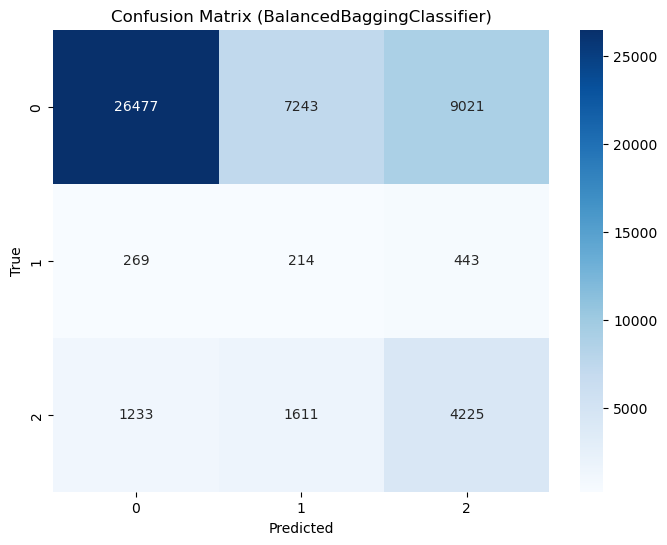

BalancedBaggingClassifier with RandomForest
Accuracy: 0.6093503626616209
Precision (macro): 0.42618610883075053
Recall (macro): 0.4827523227730059
F1 Score (macro): 0.3995605347734987
Log Loss: 0.854432185795542
Cohen Kappa Score: 0.2101434349881398

Classification Report:

              precision    recall  f1-score   support

           0     0.9463    0.6195    0.7488     42741
           1     0.0236    0.2311    0.0428       926
           2     0.3086    0.5977    0.4071      7069

    accuracy                         0.6094     50736
   macro avg     0.4262    0.4828    0.3996     50736
weighted avg     0.8406    0.6094    0.6883     50736



In [ ]:
# Balanced Bagging with Random Forest as base estimator
bbc = BalancedBaggingClassifier(
    estimator=RandomForestClassifier(random_state=42),
    sampling_strategy='auto',  # Bilancia automaticamente le classi
    replacement=False,
    n_estimators=10,
    random_state=42,
    n_jobs=-1
)

# Fit del modello
bbc.fit(X_train, y_train)

# Predizione
y_pred = bbc.predict(X_test)
y_pred_proba = bbc.predict_proba(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (BalancedBaggingClassifier)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Valutazione
print("BalancedBaggingClassifier with RandomForest")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("Log Loss:", log_loss(y_test, y_pred_proba, labels=[0, 1, 2]))
print("Cohen Kappa Score:", cohen_kappa_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

XGBoost. Also good for very unbalanced dataset

Class Weights: {0: np.float64(0.395690270352476), 1: np.float64(18.258569500674763), 2: np.float64(2.392332991477172)}


/Users/miniconda3/envs/jupyter/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:02:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1747336884418/work/src/learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


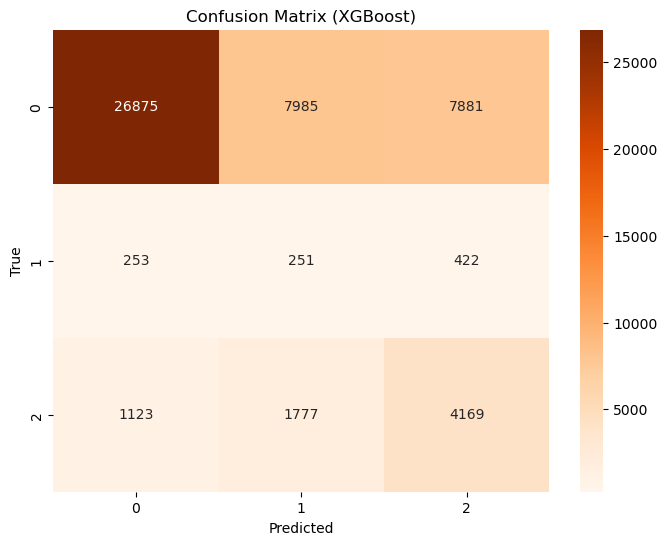

XGBoost Classifier
Accuracy: 0.616820403658152
Precision (macro): 0.4368766446346016
Recall (macro): 0.496534587039859
F1 Score (macro): 0.4099036693268843
Log Loss: 0.8462874219575712
Cohen Kappa Score: 0.22286797806863068

Classification Report:

              precision    recall  f1-score   support

           0     0.9513    0.6288    0.7571     42741
           1     0.0251    0.2711    0.0459       926
           2     0.3343    0.5898    0.4267      7069

    accuracy                         0.6168     50736
   macro avg     0.4369    0.4965    0.4099     50736
weighted avg     0.8484    0.6168    0.6981     50736



In [ ]:
# Calcolo pesi delle classi per XGBoost
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}
print("Class Weights:", class_weights_dict)

# Inizializza XGBoost
xgb = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=1  # Ignorato in multiclass, usiamo sample_weight
)

# Fit con sample_weight
sample_weights = y_train.map(class_weights_dict)
xgb.fit(X_train, y_train, sample_weight=sample_weights)

# Predict
y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluation
print("XGBoost Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("Log Loss:", log_loss(y_test, y_pred_proba, labels=[0, 1, 2]))
print("Cohen Kappa Score:", cohen_kappa_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

## Lightgbm

Dropping 'PhysActivity' with p = 0.7308
Dropping 'DiffWalk' with p = 0.5998
Dropping 'Smoker' with p = 0.5562
Dropping 'HeartDiseaseorAttack' with p = 0.5250
Dropping 'Fruits' with p = 0.4939
Dropping 'AnyHealthcare' with p = 0.2242
Dropping 'NoDocbcCost' with p = 0.1240
Dropping 'Veggies' with p = 0.1182
Dropping 'Stroke' with p = 0.0915
Selected features: ['const', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'Sex', 'Age', 'Education', 'Income']
Class weights: {np.int64(0): np.float64(1.0), np.int64(1): np.float64(1.0), np.int64(2): np.float64(1.0)}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2580
[LightGBM] [Info] Number of data points in the train set: 512886, number of used features: 12
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -

C:\Users\noah\anaconda3\envs\FODS\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\noah\anaconda3\envs\FODS\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\noah\anaconda3\envs\FODS\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\noah

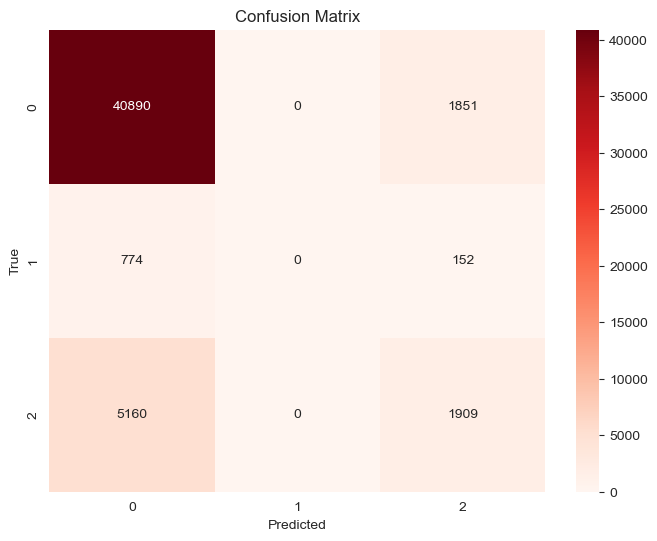

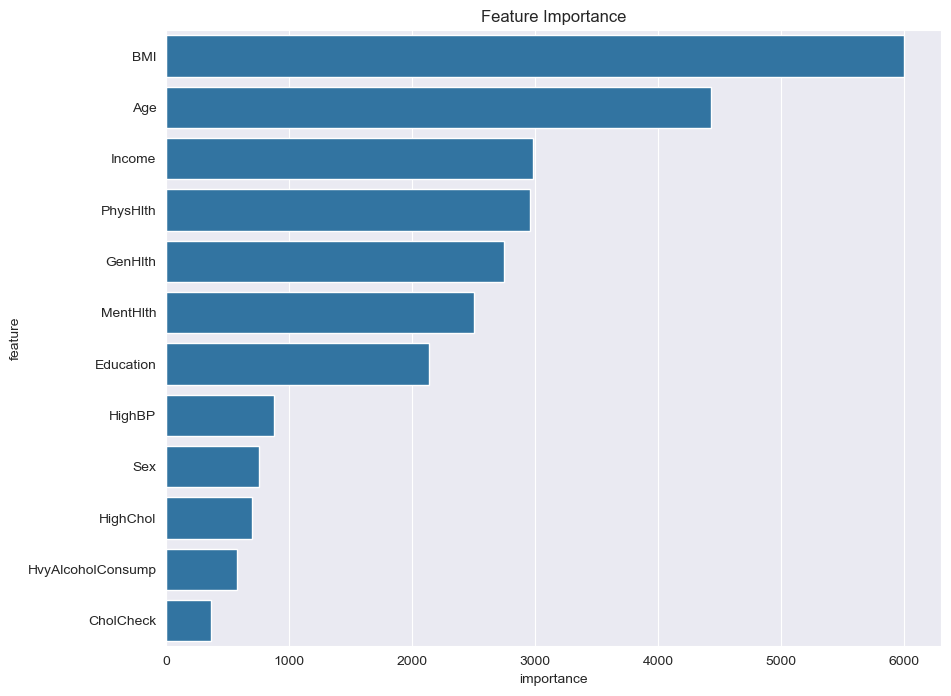

In [ ]:
# ==== Preprocessing ====
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# ==== Selezione delle migliori features ====
selected_cols = multinomial(X_scaled_df)
if 'const' in selected_cols:
    selected_cols.remove('const')
X_model = X_scaled_df[selected_cols]

# ==== Train/test split ====
X_train, X_test, y_train, y_test = train_test_split(
    X_model, y, test_size=0.2, stratify=y, random_state=42
)

# ==== Oversampling SMOTE ====
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# ==== Calcolo class_weight ====
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_bal), y=y_train_bal)
class_weight_dict = dict(zip(np.unique(y_train_bal), class_weights))
print("Class weights:", class_weight_dict)

# ==== Modello LightGBM ====
model = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=3,
    learning_rate=0.05,
    n_estimators=300,
    class_weight=class_weight_dict,
    random_state=42
)
model.fit(
    X_train_bal, y_train_bal,
    eval_set=[(X_test, y_test)],
    eval_metric='multi_logloss',
    callbacks=[lgb.early_stopping(50)]
)

# ==== Predizioni ====
y_pred = model.predict(X_test)
y_pred_probs = model.predict_proba(X_test)

# ==== Valutazione ====
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, digits=4))

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision (macro): {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-score (macro): {f1_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Log Loss: {log_loss(y_test, y_pred_probs):.4f}")
print(f"Cohen's Kappa: {cohen_kappa_score(y_test, y_pred):.4f}")

# ==== Confusion Matrix ====
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ==== Feature Importance ====
importance = model.feature_importances_
feature_names = X_model.columns

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importance
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title('Feature Importance')
plt.show()